# Filter and plot of Game Data
The idea of this project was to play a little with this data while practing my python and some libraries, in the end I made 2 functions: one to filter and plot, and another compare information:

1. make_sales_data(year=0, top=10, console_code="", publisher="", genre="", name="", console_type="", console_manufacturer="", console_name="", sales=regions, plot=True)
*     Is capable of filtering the whole data in multiple ways, can also plot this data
*     Some possible filters:
        
            Sales of the top 10 games
            Sales of the top 10 Mario games in Japan
            Sales of the top 10 Final Fantasy Role-Playing games on Sony's console
            Sales of the top 10 games of 2010 on Wii in Japan and Other
            Sales of the top 5 Misc games publish by Nintendo
            Sales of the top 10 Sim games on PC
    
2. plot_compare(data_array)
*     Compare an array of data plotting them side by side
*     Some possible comparations:
        
            Sales of the top 5 games on a Nintendo's console with
            Sales of the top 3 games on Sony's console and
            Sales of the top 10 games on a Microsoft's console

            Sales of the top 10 Action games on Nintendo's console with
            Sales of the top 10 Action games on Sony's console        

            Sales of the top 10 Mario games in North America with
            Sales of the top 10 Sonic games in North America
    
The idea of those functions is to use make_sales_data to filter the data whatever way you want and plot it. Then if you want to compare this data, you pass it to plot_compare to see it side by side or merge them.

I also added some information to the base data, for example, I added the Console Manufactor and the number of sold consoles data, that I use to calcule the number of units sold by console sold.

What the filter can't do: filter multiple values or intervals. You can compare multiple values if filtering individually and comparing them with plot_compare. I was thinking of work with intervals, but that would increase too much the complexity.

If you find something wrong or can improve my code in any way, feel free to comment

Thanks

# Preparing the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/game-console-manufactor-and-sales/console_color.csv
/kaggle/input/game-console-manufactor-and-sales/sale_type_color.csv
/kaggle/input/game-console-manufactor-and-sales/console.csv
/kaggle/input/videogamesales/vgsales.csv


In [2]:
data = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [3]:
data.dropna(inplace=True)

In [4]:
console_data = pd.read_csv("/kaggle/input/game-console-manufactor-and-sales/console.csv")

manufacturer = dict(zip(console_data["ConsoleID"],console_data["Manufacturer"]))

data["Console_Manufacturer"] = data["Platform"].map(manufacturer)

In [5]:
import csv
color = dict()
with open('/kaggle/input/game-console-manufactor-and-sales/console_color.csv', mode='r') as file:
    reader = csv.reader(file)
    color = {k:v for k, v in reader}
color.pop("Manufacturer")

'Color'

In [6]:
console_type = dict(zip(console_data["ConsoleID"],console_data["Type"]))

data["Console_Type"] = data["Platform"].map(console_type)

In [7]:
console_name = dict(zip(console_data["ConsoleID"],console_data["Console_Name"]))

data["Console_Name"] = data["Platform"].map(console_name)

In [8]:
unitssold = dict(zip(console_data["ConsoleID"],console_data["Sales"]))

data["Console_Sales"] = data["Platform"].map(unitssold)
data["Sales_per_Console"] = data["Global_Sales"] / data["Console_Sales"]

In [9]:
platform = data['Platform'].value_counts().index
colors = []
for p in platform:
    colors.append(color[manufacturer[p]])

In [10]:
import matplotlib.patches as mpatches

handles = []
for key, value in color.items():
    handles.append(mpatches.Patch(color=value, label=key))

# Released Games on this Data by Platform

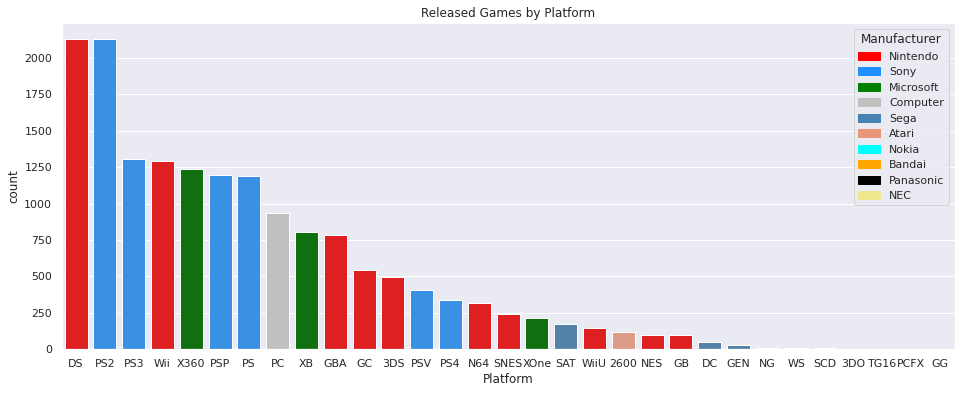

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

plt.figure(figsize=(16,6))
plt.title("Released Games by Platform")
plt.ylabel("Released Games")
sns.countplot(x="Platform", data=data, order=platform, palette=colors)
plt.legend(title='Manufacturer', loc='upper right', labels=color, handles=handles)

# make_sales_data Data Filtering and Plotting

In [12]:
data["Year"] = data["Year"].astype('int')

In [13]:
import csv
sales_color = dict()
with open('/kaggle/input/game-console-manufactor-and-sales/sale_type_color.csv', mode='r') as file:
    reader = csv.reader(file)
    sales_color = {k:v for k, v in reader}
sales_color.pop("Sale_Type")

regions = list(sales_color.keys())
regions.remove("Sales_per_Console")

In [14]:
def make_sales_data(year=0, top=10, console_code="", publisher="", genre="", name="", console_type="", console_manufacturer="", console_name="", sales=regions, plot=True):
    subdata = data.copy()
    backlabel = ""
        
    if year != 0:
        subdata = subdata[subdata["Year"] == year]#.sort_values("Global_Sales", ascending=False)
        backlabel += f" of {year}"
    
    if console_type is not "":
        subdata = subdata[subdata["Console_Type"].str.contains(console_type)]
        console_type = console_type + " "
    
    if console_name is not "":
        subdata = subdata[subdata["Console_Name"].str.contains(console_name)]
        backlabel += f" on {console_type}{console_name}"
        if console_manufacturer is not "":
            subdata = subdata[subdata["Console_Manufacturer"].str.contains(console)]
            if console != "Computer":
                backlabel += f"({console_type}{console_manufacturer})"
    elif console_code is not "":
        subdata = subdata[subdata["Platform"].str.contains(console_code)]
        backlabel += f" on {console_type}{console_code}"
        if console_manufacturer is not "":
            subdata = subdata[subdata["Console_Manufacturer"].str.contains(console)]
            if console != "Computer":
                backlabel += f"({console_type}{console_manufacturer})"
    elif console_manufacturer is not "":
        subdata = subdata[subdata["Console_Manufacturer"].str.contains(console_manufacturer)]
        if console_manufacturer == "Computer":
            backlabel += f" on {console_type}Computer"
        else:
            backlabel += f" on a {console_manufacturer}'s {console_type}console"
    
    if publisher is not "":
        subdata = subdata[subdata["Publisher"].str.contains(publisher)]
        backlabel += f" publish by {publisher}"
    
    if genre is not "":
        subdata = subdata[subdata["Genre"].str.contains(genre)]
        genre += " "
    
    if name is not "":
        subdata = subdata[subdata["Name"].str.contains(name)]
        name += " "
    
    if len(subdata) == 0:
        print("There is no game with those parameters")
        return
    
    top = min(top, len(subdata))
    
    label = f"Sales of the top {top} {name}{genre}games" + backlabel
    
    graph_colors = []
    
    subdata["Total_Sales"] = 0
    
    if "Sales_per_Console" in sales:
        graph_colors.append(sales_color["Sales_per_Console"])
        subdata["Total_Sales"] = subdata["Sales_per_Console"] 
    else:
        subdata["Sales_per_Console"] = 0
        for region in regions:
            if region in sales:
                graph_colors.append(sales_color[region])
                subdata["Total_Sales"] = subdata["Total_Sales"] + subdata[region]
            else:
                subdata[region] = 0
    
    subdata.sort_values(by="Total_Sales", ascending=False, inplace=True)
    
    subdata = subdata[:top]  
    
    def new_name(d):
        name = d[0]
        platform = d[1]
        if len(name) > 40:
            name = name[:40] + "..."
        return name + " (" + platform + ")"
    
    subdata["Name"] = subdata[["Name", "Platform"]].apply(new_name, axis=1)
    
    if plot:
        size = max(top, 5)
        chart = subdata.loc[:,sales].plot.bar(stacked=True, figsize=(size,7), color=graph_colors)
        chart.set_xticklabels(subdata["Name"], rotation=45, horizontalalignment='right')
        plt.ylabel("Sales")
        plt.title(label)
        plt.legend(title="Region")
    else:
        return label, subdata

# Filter Plots

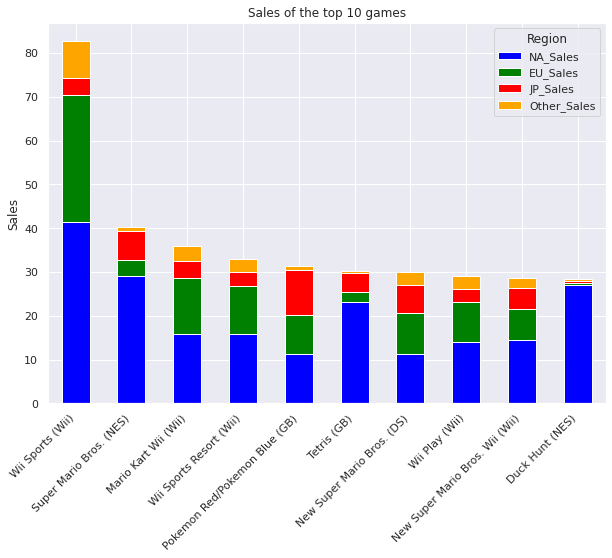

In [15]:
make_sales_data()

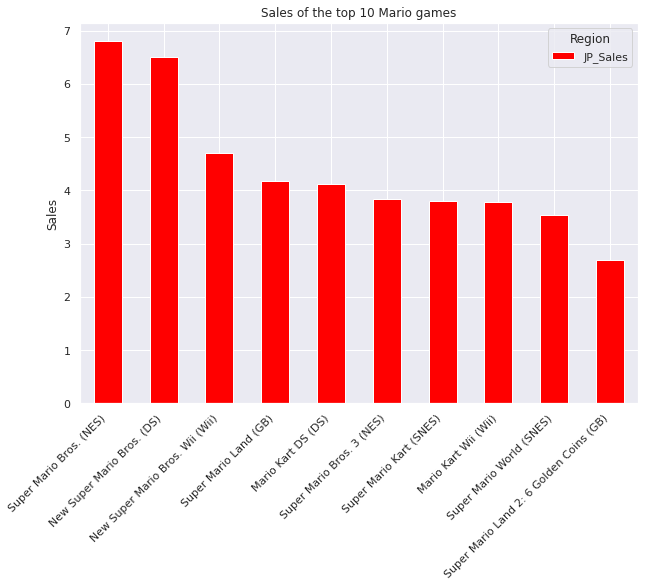

In [16]:
make_sales_data(name="Mario", sales=["JP_Sales"])

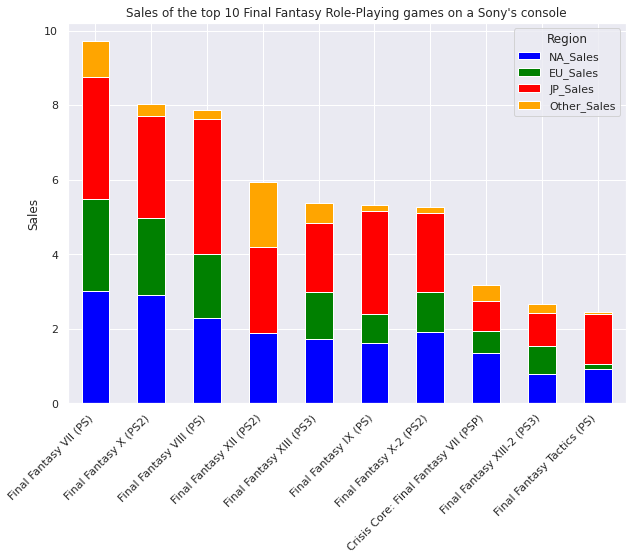

In [17]:
make_sales_data(name="Final Fantasy", genre="Role-Playing", console_manufacturer="Sony")

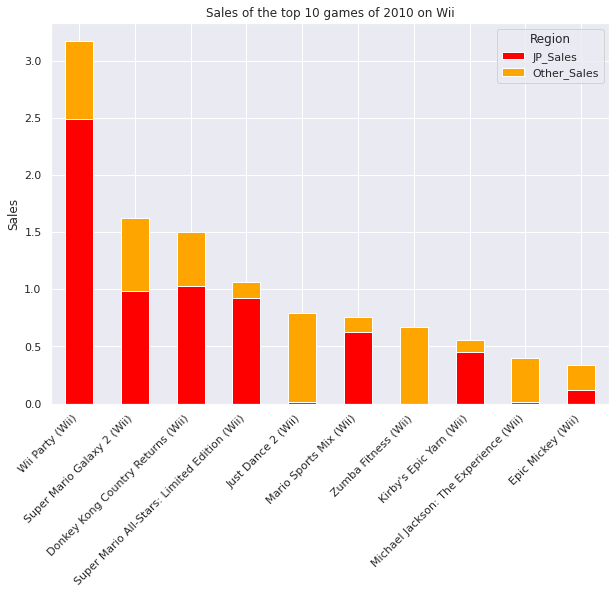

In [18]:
make_sales_data(sales=["JP_Sales", "Other_Sales"], console_code="Wii", year=2010)

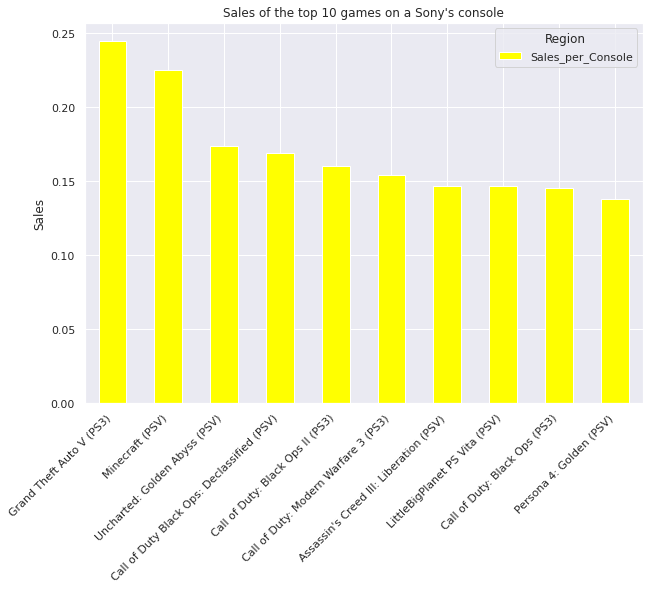

In [19]:
make_sales_data(sales=["Sales_per_Console"], console_manufacturer="Sony")

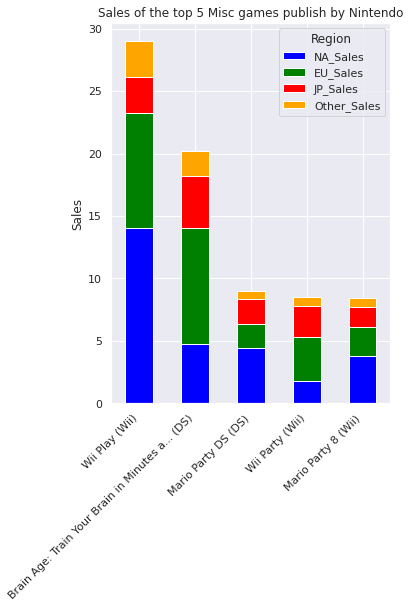

In [20]:
make_sales_data(genre="Misc", top=5, publisher="Nintendo")

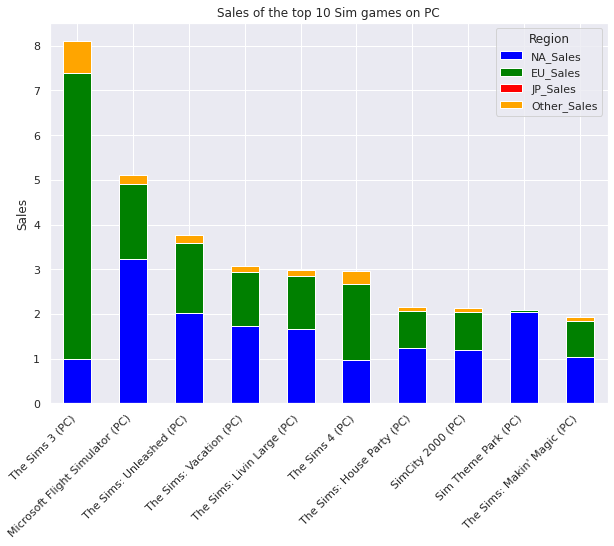

In [21]:
make_sales_data(console_code="PC", name="Sim")

# plot_compare Comparing Filtered Data

In [22]:
import math
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

def plot_compare(data_array, merge=False):
    if len(data_array) <= 1 or data_array is None:
        print("You need at least 2 datas to compare")
        return
    
    enlarge = 1
    
    sale_type_region = False
    sale_type_console = False
    
    handles = []
    legend_color = []
    
    if merge:
        d = []
        l = ""
        lines = 0
        color_label = list(mcolors.TABLEAU_COLORS.keys())[::-1]
        c = 0
        for label, data in data_array:
            if data["Sales_per_Console"].mean() != 0:
                sale_type_console = True
            else:
                sale_type_region = True

            if sale_type_console and sale_type_region:
                print("You are mixing Region Sales with Sales Per Console.")
                return
            handles.append(label)
            legend_color.append(color_label[c].split(":")[1])
            l += label + " (" + color_label[c].split(":")[1] + ")\n"
            data["Color"] = color_label[c]
            c += 1
            if c >= len(color_label):
                c = 0
            d.append(data)
            lines += len(data)
        d = pd.concat(d)
        d.sort_values(by="Total_Sales", ascending=False, inplace=True)
        data_array = []
        data_array.append((l, d))
        
        if lines > 20:
            enlarge = 2
    else:
        for label, data in data_array:
            if data["Sales_per_Console"].mean() != 0:
                sale_type_console = True
            else:
                sale_type_region = True

            if sale_type_console and sale_type_region:
                print("You are mixing Region Sales with Sales Per Console.")
                return
    col = 1
    if len(data_array) >= 2:
        col = 2
    row = math.ceil(len(data_array) / 2)

    fig, axes = plt.subplots(figsize=(10*col*enlarge,7*row), nrows=row,ncols=col, sharey=True)

    graph_colors = []
    sale_type = []
    
    if sale_type_region:
        for place in regions:
            graph_colors.append(sales_color[place])
            sale_type.append(place)
    if sale_type_console:
        graph_colors.append(sales_color["Sales_per_Console"])
        sale_type.append("Sales_per_Console")
    
    actual_col = 0
    actual_row = 0
    
    for index in range(len(data_array)):
        if len(data_array) == 1:
            ax = axes
        elif len(data_array)>= 3:
            ax = axes[actual_row][actual_col]
        else:
            ax = axes[actual_col]
        ax.set_ylabel("Sales")
        
        if "\n" not in data_array[index][0]:
            ax.set_title(data_array[index][0])

        subdata = data_array[index][1].copy()
        
        chart = subdata.loc[:,sale_type].plot.bar(ax=ax, stacked=True, color=graph_colors)
        chart.set_xticklabels(subdata["Name"], rotation=25, horizontalalignment='right')
        
        if "Color" in subdata.columns:
            label_color = subdata["Color"]
            for xtick, color in zip(ax.get_xticklabels(), label_color):
                xtick.set_color(color)
        
        actual_col += 1
        if actual_col == 2:
            actual_col = 0
            actual_row += 1
    
    if len(data_array) % 2 == 1 and len(data_array) > 1:
        ax = axes[actual_col]
        if len(data_array)>= 3:
            ax = axes[actual_row][actual_col]
        plt.delaxes(ax)
    plt.tight_layout()
    leg1 = plt.legend(title="Region")
    
    if len(handles) >= 1:
        
        legend_handles = []
        index = 0
        for handle in handles:
            legend_handles.append(mpatches.Patch(color=legend_color[index], label=handle))
            index += 1
                
        leg2 = plt.legend(handles=legend_handles, labels=handles, loc='upper center', title="Data Compare", bbox_to_anchor=(0.5, 1.1), shadow=True)
        ax.add_artist(leg1)

# Compared Plotting

/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/opt/conda/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:3

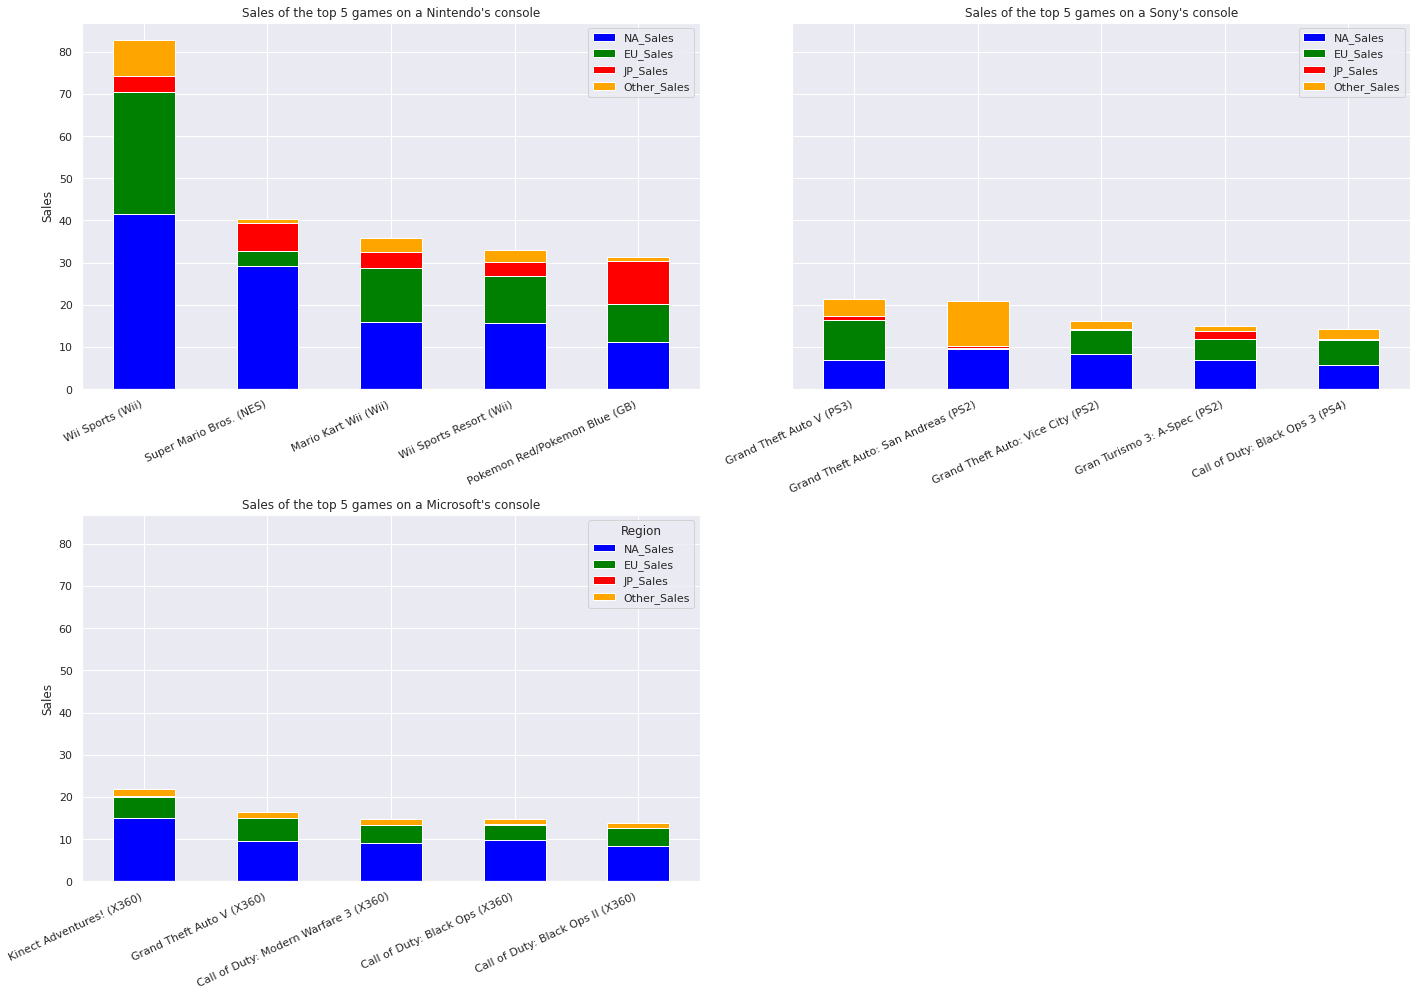

In [23]:
data1 = make_sales_data(top=5, console_manufacturer="Nintendo", plot=False)
data2 = make_sales_data(top=5, console_manufacturer="Sony", plot=False)
data3 = make_sales_data(top=5, console_manufacturer="Microsoft", plot=False)
plot_compare([data1, data2, data3])

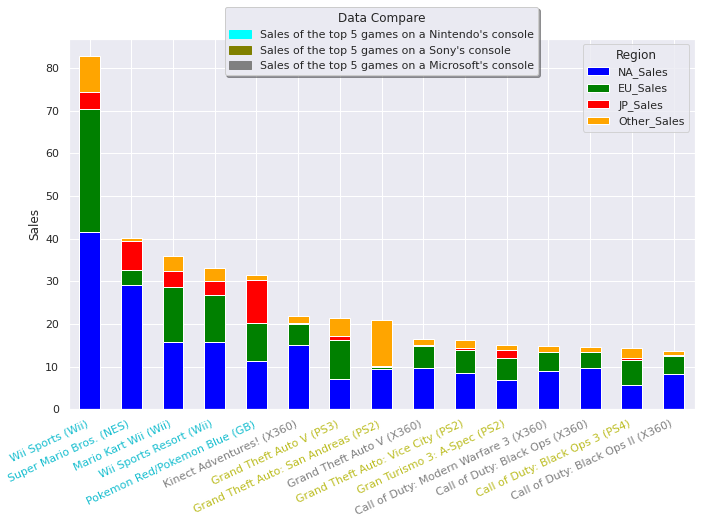

In [24]:
data1 = make_sales_data(top=5, console_manufacturer="Nintendo", plot=False)
data2 = make_sales_data(top=5, console_manufacturer="Sony", plot=False)
data3 = make_sales_data(top=5, console_manufacturer="Microsoft", plot=False)
plot_compare([data1, data2, data3], merge=True)

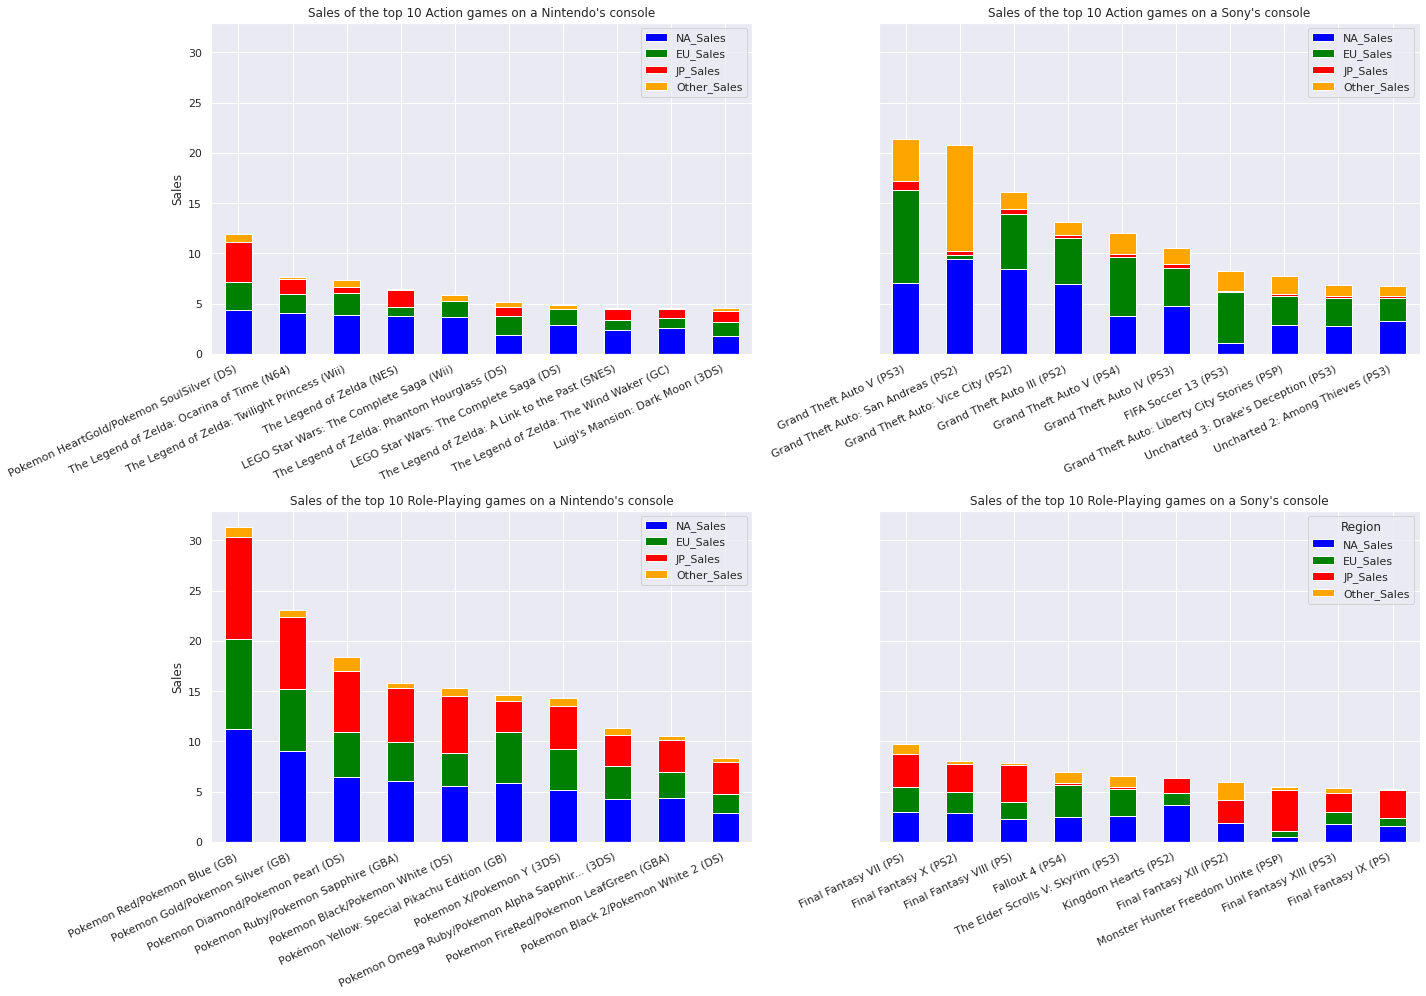

In [25]:
data_compare = []
data_compare.append(make_sales_data(genre="Action", console_manufacturer="Nintendo", plot=False))
data_compare.append(make_sales_data(genre="Action", console_manufacturer="Sony", plot=False))
data_compare.append(make_sales_data(genre="Role-Playing", console_manufacturer="Nintendo", plot=False))
data_compare.append(make_sales_data(genre="Role-Playing", console_manufacturer="Sony", plot=False))
plot_compare(data_compare)

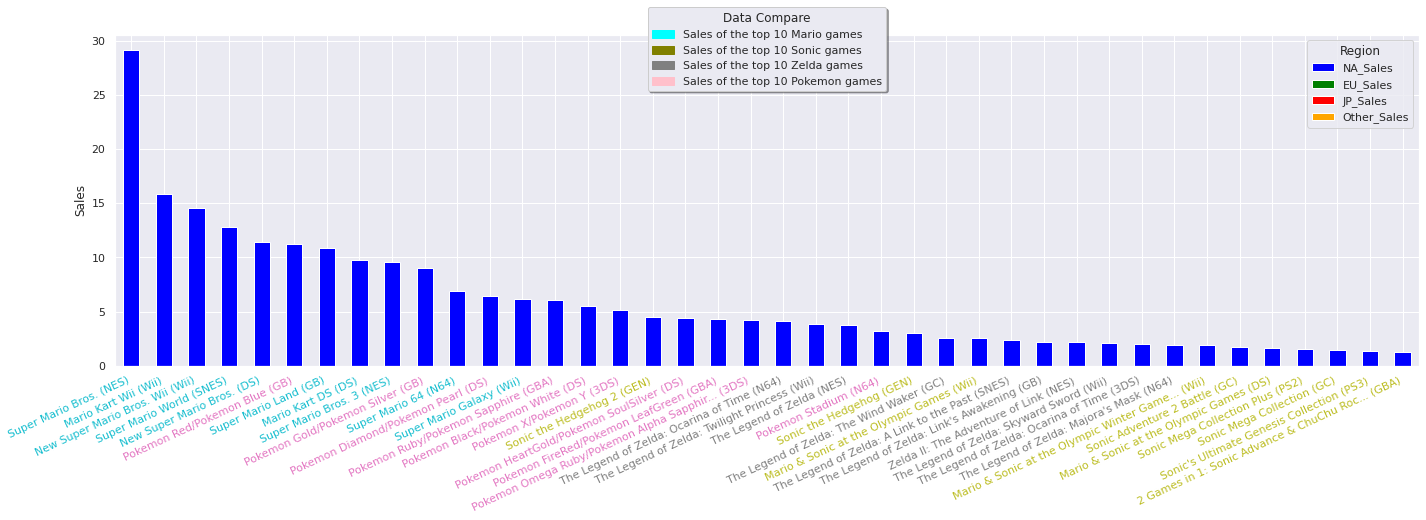

In [26]:
data_compare = []
data_compare.append(make_sales_data(name="Mario", plot=False, sales=["NA_Sales"]))
data_compare.append(make_sales_data(name="Sonic", plot=False, sales=["NA_Sales"]))
data_compare.append(make_sales_data(name="Zelda", plot=False, sales=["NA_Sales"]))
data_compare.append(make_sales_data(name="Pokemon", plot=False, sales=["NA_Sales"]))
plot_compare(data_compare, merge=True)

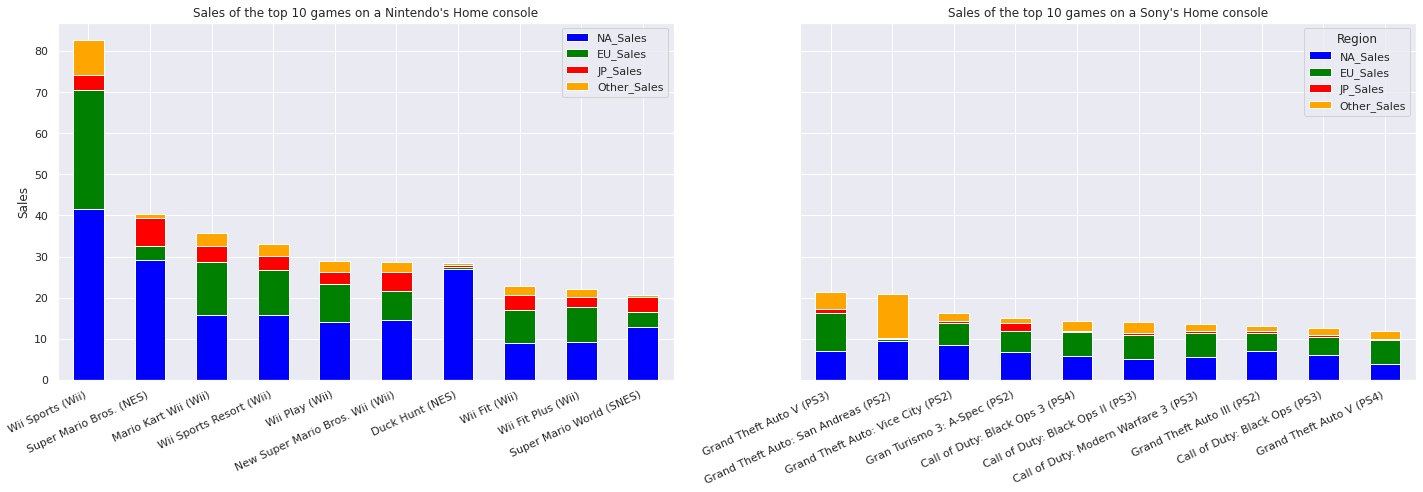

In [27]:
data_compare = []
data_compare.append(make_sales_data(console_type="Home", console_manufacturer="Nintendo", plot=False))
data_compare.append(make_sales_data(console_type="Home", console_manufacturer="Sony", plot=False))
plot_compare(data_compare)

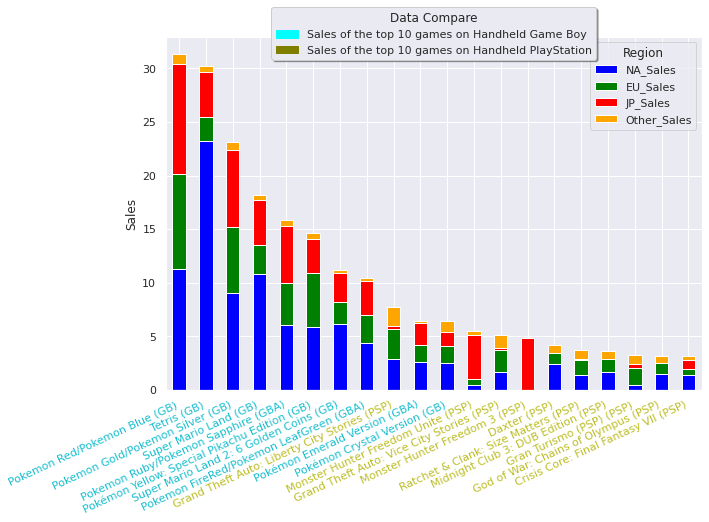

In [28]:
data_compare = []
data_compare.append(make_sales_data(console_type="Handheld", console_name="Game Boy", plot=False))
data_compare.append(make_sales_data(console_type="Handheld", console_name="PlayStation", plot=False))
plot_compare(data_compare, merge=True)

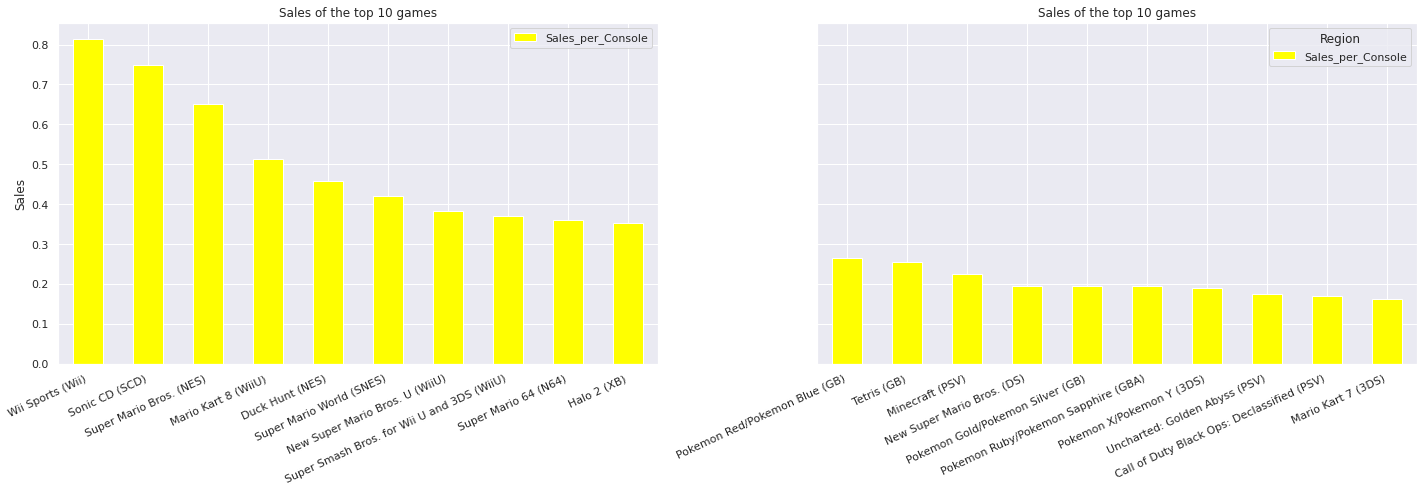

In [29]:
data_compare = []
data_compare.append(make_sales_data(console_type="Home", sales=["Sales_per_Console"], plot=False))
data_compare.append(make_sales_data(console_type="Handheld", sales=["Sales_per_Console"], plot=False))
plot_compare(data_compare)

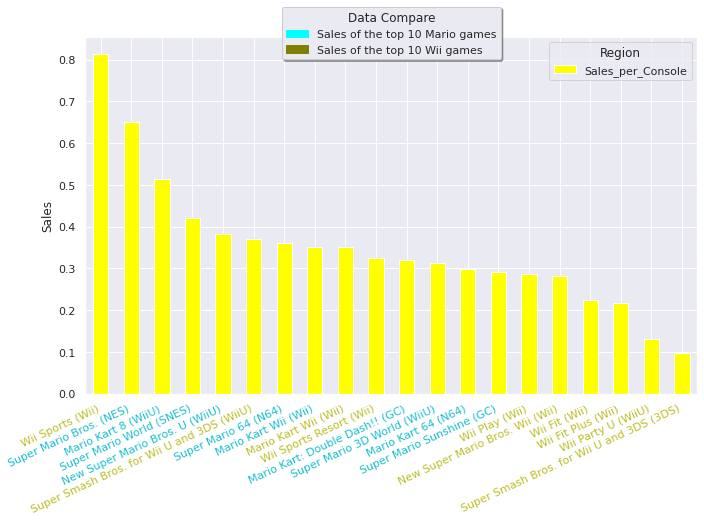

In [30]:
data_compare = []
data_compare.append(make_sales_data(name="Mario", sales=["Sales_per_Console"], plot=False))
data_compare.append(make_sales_data(name="Wii", sales=["Sales_per_Console"], plot=False))
plot_compare(data_compare, merge=True)

In [31]:
data_compare = []
data_compare.append(make_sales_data(console_type="Home", sales=["NA_Sales"], plot=False))
data_compare.append(make_sales_data(console_type="Handheld", sales=["Sales_per_Console"], plot=False))
plot_compare(data_compare, merge=True)

You are mixing Region Sales with Sales Per Console.
